In [86]:
import numpy as np
import pandas as pd


In [87]:
df = pd.read_csv("/content/spam.csv", encoding='latin-1')

In [88]:
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [89]:
df.shape

(5572, 5)

# **Data Cleaning**

In [95]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [96]:
df.head(5)

,target,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [97]:
df.rename(columns={'v1':'target', 'v2':'message'}, inplace=True)
df.head()

,target,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [98]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [99]:
df['target']=encoder.fit_transform(df['target'])

In [100]:
df.head()

,target,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [101]:
df.duplicated().sum()

np.int64(403)

In [102]:
df.drop_duplicates(keep='first', inplace=True)

In [104]:
df.duplicated().sum()

np.int64(0)

In [105]:
df.shape
#403 rows deleted

(5169, 2)

# **EDA**

In [106]:
df.sample(5)

,target,message
3321,0,Ok darlin i supose it was ok i just worry too ...
3876,0,"Sorry sir, i will call you tomorrow. senthil...."
3417,1,LIFE has never been this much fun and great un...
4765,0,Whens your radio show?
4318,0,Are you still playing with gautham?


In [107]:
df['target'].value_counts()

,count
target,
0,4516
1,653


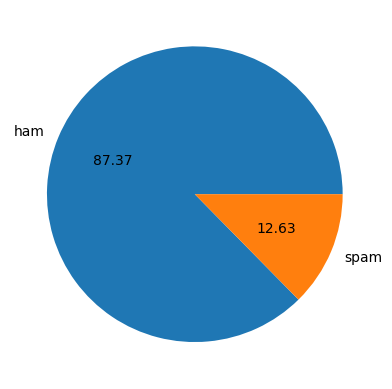

In [108]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [109]:
!pip install nltk

In [110]:
import nltk

In [111]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [118]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [119]:
df['num_chars']=df['message'].apply(len)

In [123]:
df['num_words']=df['message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [124]:
df.head()

,target,message,num_chars,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [128]:
df['num_sentences']=df['message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [129]:
df.sample(5)

,target,message,num_chars,num_words,num_sentences
1422,1,Congratulations ur awarded either å£500 of CD ...,152,25,1
1954,0,Good night. Am going to sleep.,30,8,2
229,0,Dear good morning now only i am up,34,8,1
2281,0,"I hav almost reached. Call, i m unable to conn...",52,14,2
2454,0,Left dessert. U wan me 2 go suntec look 4 u?,44,13,2


In [131]:
df[['num_chars','num_words','num_sentences']].describe()

,num_chars,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [132]:
df[df['target']==0][['num_chars','num_words','num_sentences']].describe()

,num_chars,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [133]:
df[df['target']==1][['num_chars','num_words','num_sentences']].describe()

,num_chars,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [134]:
import seaborn as sns

<Axes: xlabel='num_chars', ylabel='Count'>

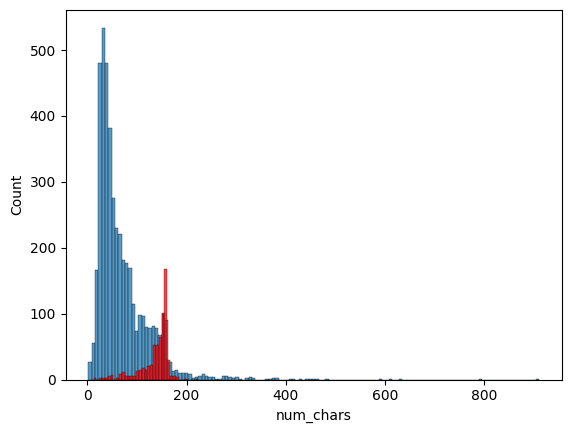

In [135]:
sns.histplot(df[df['target']==0]['num_chars'])
sns.histplot(df[df['target']==1]['num_chars'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

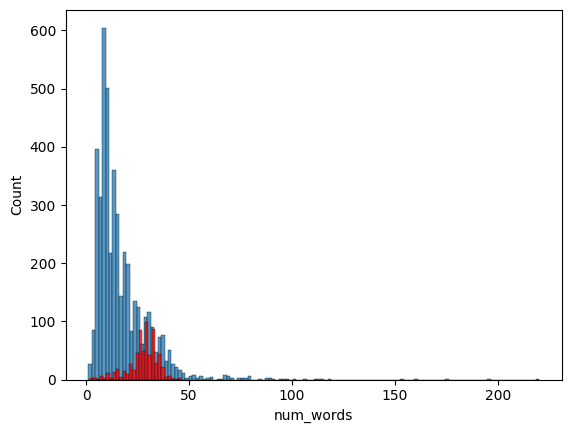

In [136]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'], color='red')

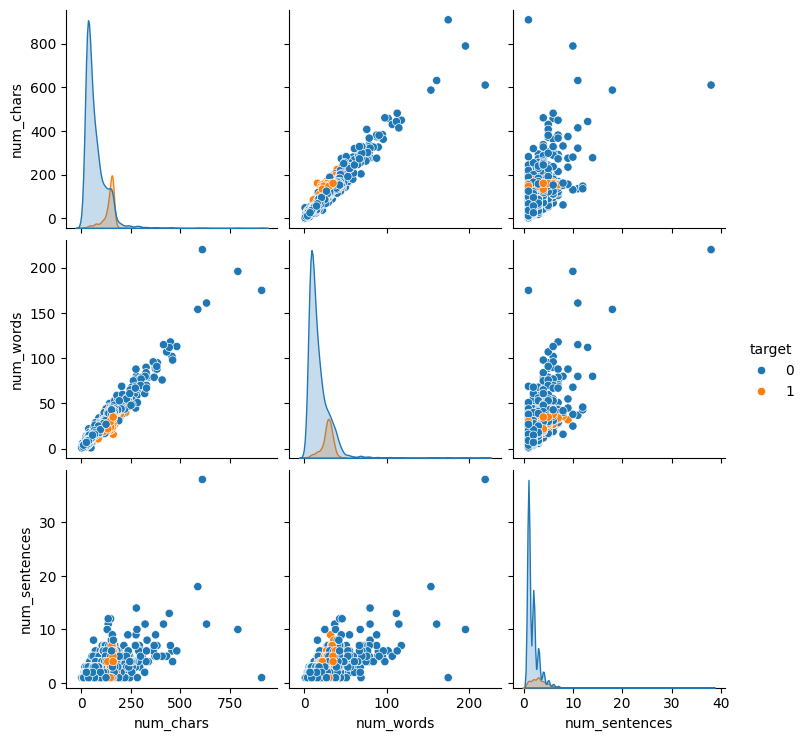

In [137]:
sns.pairplot(df,hue='target')

In [141]:
new_df=df.drop(columns=['message'])

In [142]:
new_df.head()

,target,num_chars,num_words,num_sentences
0,0,111,24,2
1,0,29,8,2
2,1,155,37,2
3,0,49,13,1
4,0,61,15,1


<Axes: >

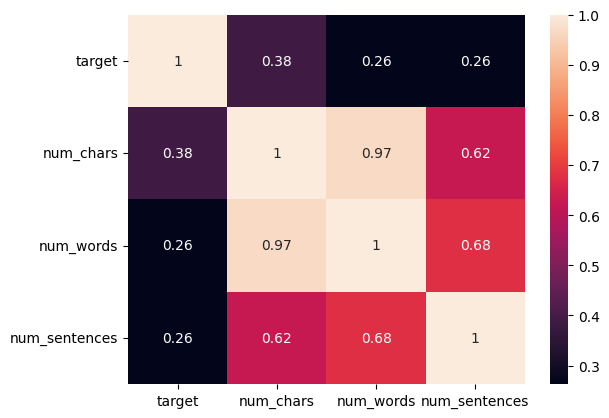

In [145]:
sns.heatmap(new_df.corr(), annot=True)

# **3. Data** **Preprocessing**

*   lower case
*   Tokenization
*   Removing special characters
*   Removing stop words and punctuation
*   Stemming







In [161]:
!pip install nltk

In [164]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [165]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [166]:
def transform_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)

  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)

  text=y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text= y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

In [167]:
df['message'][379]

'I taught that Ranjith sir called me. So only i sms like that. Becaus hes verifying about project. Prabu told today so only pa dont mistake me..'

In [168]:
transform_text(df['message'][379])

'taught ranjith sir call sm like becau he verifi project prabu told today pa dont mistak'

In [184]:
df['transformed_msg']=df['message'].apply(transform_text)

In [187]:
df.head()

,target,message,num_chars,num_words,num_sentences,transformed_msg
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [191]:
from wordcloud import WordCloud
wc=WordCloud(width=500, height=500, min_font_size=10, background_color='lightblue')

In [192]:
spam_wc=wc.generate(df[df['target']==1]['transformed_msg'].str.cat(sep=" "))

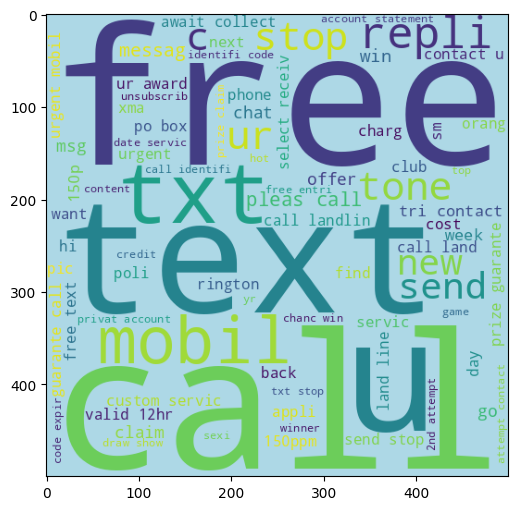

In [194]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [195]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_msg'].to_list():
  for word in msg.split():
    spam_corpus.append(word)


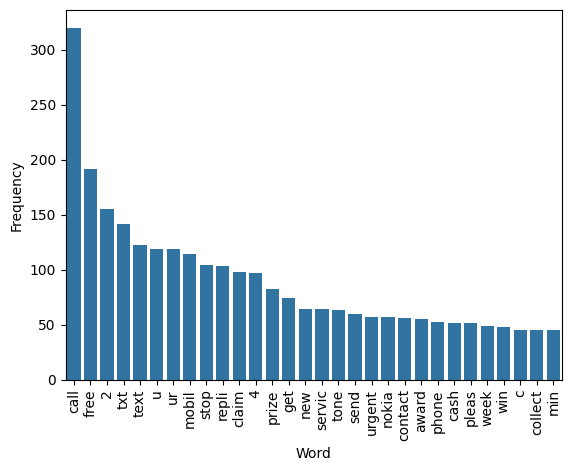

In [200]:
from collections import Counter

# Create a DataFrame from the Counter object
spam_df = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Frequency'])

# Use the 'x' and 'y' keyword arguments in sns.barplot
sns.barplot(x='Word', y='Frequency', data=spam_df)
plt.xticks(rotation='vertical')
plt.show()

In [202]:
len(ham_corpus)

35404

In [207]:
ham_wc=wc.generate(df[df['target']==0]['transformed_msg'].str.cat(sep=" "))

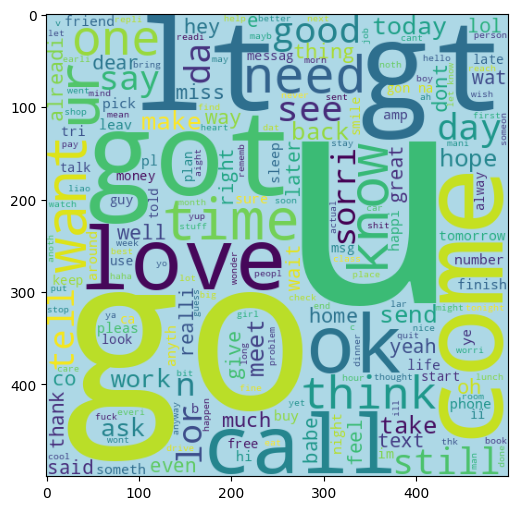

In [208]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [201]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_msg'].to_list():
  for word in msg.split():
    ham_corpus.append(word)

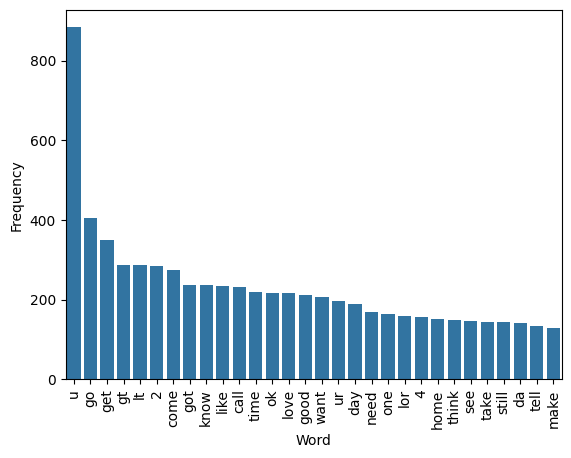

In [204]:
from collections import Counter

# Create a DataFrame from the Counter object
spam_df = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['Word', 'Frequency'])

# Use the 'x' and 'y' keyword arguments in sns.barplot
sns.barplot(x='Word', y='Frequency', data=spam_df)
plt.xticks(rotation='vertical')
plt.show()

# **Model Building**

In [230]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [231]:
X=tfidf.fit_transform(df['transformed_msg']).toarray()

In [232]:
X.shape

(5169, 3000)

In [233]:
y=df['target'].values

In [234]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [235]:
from sklearn.model_selection import train_test_split

In [236]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [242]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [243]:
svc=SVC(kernel='sigmoid', gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear', penalty='l1')
rfc=RandomForestClassifier(n_estimators=50, random_state=2)
abc=AdaBoostClassifier(n_estimators=50, random_state=2)
bc=BaggingClassifier(n_estimators=50, random_state=2)
etc=ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb=XGBClassifier(n_estimators=50, random_state=2)

In [244]:
classifiers= {
    'SVC':svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'BgC':bc,
    'ETC':etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [245]:
def train_classifier(classifier,X_train,y_train,X_test,y_test):
  classifier.fit(X_train,y_train)
  y_pred=classifier.predict(X_test)
  accuracy=accuracy_score(y_test,y_pred)
  precision=precision_score(y_test,y_pred)

  return accuracy,precision

In [246]:
train_classifier(abc,X_train,y_train,X_test,y_test)

(0.9216634429400387, 0.8202247191011236)

In [247]:
accuracy_scores=[]
precision_scores=[]

for name,classifier in classifiers.items():
  current_accuracy,current_precision=train_classifier(classifier,X_train,y_train,X_test,y_test)
  print(f"For {name} classifier, accuracy is {current_accuracy} and precision is {current_precision}")
  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)
#

For SVC classifier, accuracy is 0.9758220502901354 and precision is 0.9747899159663865
For KN classifier, accuracy is 0.9052224371373307 and precision is 1.0
For NB classifier, accuracy is 0.9709864603481625 and precision is 1.0
For DT classifier, accuracy is 0.9332688588007737 and precision is 0.8415841584158416
For LR classifier, accuracy is 0.9555125725338491 and precision is 0.96
For RF classifier, accuracy is 0.9738878143133463 and precision is 0.9826086956521739
For AdaBoost classifier, accuracy is 0.9216634429400387 and precision is 0.8202247191011236
For BgC classifier, accuracy is 0.9584139264990329 and precision is 0.8682170542635659
For ETC classifier, accuracy is 0.9748549323017408 and precision is 0.9745762711864406
For GBDT classifier, accuracy is 0.9506769825918762 and precision is 0.9306930693069307
For xgb classifier, accuracy is 0.965183752417795 and precision is 0.9396551724137931


In [248]:
performance_df=pd.DataFrame({'Algorithm':classifiers.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [249]:
performance_df1= pd.melt(performance_df, id_vars =["Algorithm"])

In [250]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.973888,0.982609
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.955513,0.960000
10,xgb,0.965184,0.939655
9,GBDT,0.950677,0.930693
7,BgC,0.958414,0.868217
3,DT,0.933269,0.841584


In [237]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [238]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [239]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.874274661508704
[[790 106]
 [ 24 114]]
0.5181818181818182


In [240]:
# multinomial naive bayes is best suitable algorithm for spam sms classification.
# precision is more prior to accuracy in spam classification

mnb.fit(X_train,y_train)
y_pred1=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [241]:
bnb.fit(X_train,y_train)
y_pred1=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187
